In [23]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import numpy as np
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torch.nn as nn
import utils as ut

transform = transforms.Compose([
    transforms.ToTensor(),
    torchvision.transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.247, 0.243, 0.261])
])

dataset = CIFAR10(root='data/', download=True, transform=transform)
test_data = CIFAR10(root='data/', train=False, transform=transform)

val_size = 5000
train_size = len(dataset) - val_size

train_data, val_data = random_split(dataset, [train_size, val_size])

BATCH_SIZE = 10
SHUFFLE = False
EPOCH = 30

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=SHUFFLE)
test_loader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=SHUFFLE)

torch.cuda.is_available()

Files already downloaded and verified


False

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


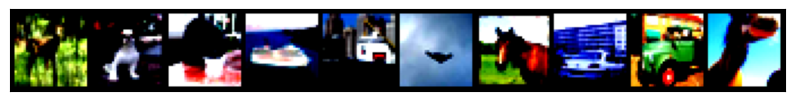

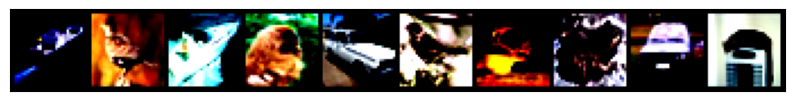

In [24]:
def show_batch(dl):
    for images,lables in dl:
        fig, ax = plt.subplots(figsize = (10,10))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,10).permute(1,2,0))
        break

# show a batch
show_batch(train_loader)
show_batch(val_loader)

In [25]:
class NetLReLU(nn.Module):
    def __init__(self):
        super(NetLReLU, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.af = nn.LeakyReLU(0.1)
        self.fc1 = nn.Linear(1600, 120)
        self.fc2 = nn.Linear(120, 10)

    def forward(self, x):
        # Implement the forward function in the network
        x = self.conv1(x)
        x = self.af(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.af(x)
        x = x.flatten(1)
        x = self.fc1(x)
        x = self.af(x)
        x = self.fc2(x)
        return x

In [26]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('runs/CIFAR10_3')

Epoch 0, training loss: 0.14334184109038778, validation loss: 0.12606081268787384
Train accuracy = 0.48257777777777777
Validation accuracy = 0.5514
Epoch 5, training loss: 0.07266233054631287, validation loss: 0.14119234936237335
Train accuracy = 0.7474
Validation accuracy = 0.5804
Epoch 10, training loss: 0.046117966349412585, validation loss: 0.22397794866114853
Train accuracy = 0.8374222222222222
Validation accuracy = 0.5418
Epoch 15, training loss: 0.034129402969119836, validation loss: 0.3009538077123463
Train accuracy = 0.881
Validation accuracy = 0.5554
Epoch 20, training loss: 0.027150377442695994, validation loss: 0.3978287434324622
Train accuracy = 0.9082666666666667
Validation accuracy = 0.5476
Epoch 25, training loss: 0.02503190599052711, validation loss: 0.43970333877541123
Train accuracy = 0.9210888888888888
Validation accuracy = 0.5532


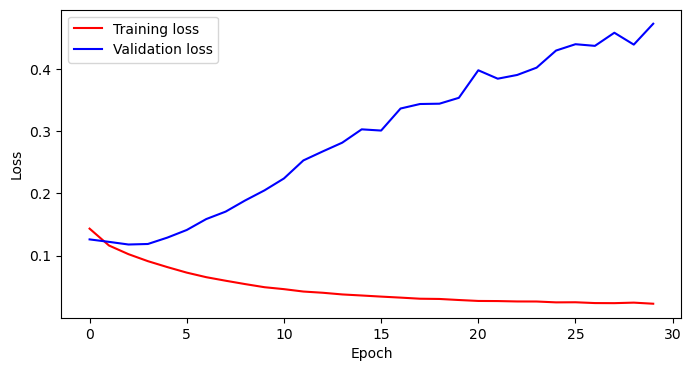

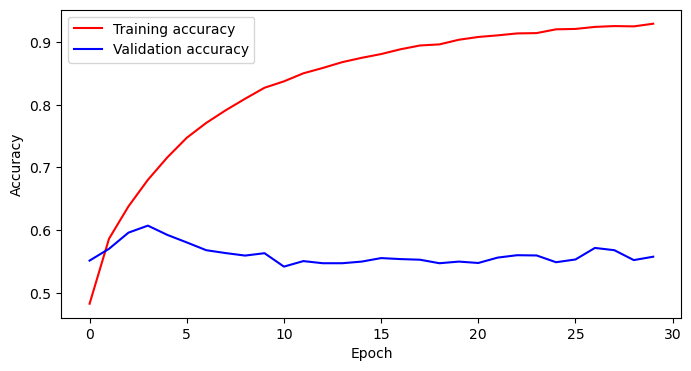

lowest loss for validation set: 0.11785428393781185, with an accuracy of 0.596
Test accuracy is 56.0%.


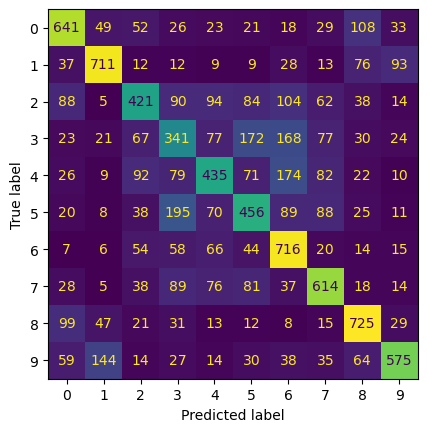

In [27]:

# Hyperparams. Set these to reasonable values
LEARNING_RATE = 0.001
epochs = EPOCH

# Load our network
model = NetLReLU()

# Define our loss function
criterion = nn.CrossEntropyLoss()

# Define our optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
run_name = "LReLU_ADAM.pt"
# Train the model
ut.train_model(model, criterion, optimizer, train_loader, val_loader, run_name, writer, epochs, device)
model = torch.load(run_name)
model.to(device)
ut.test_model(model, test_loader, device)